# Public 데이터 탐색

- 인터넷에서 공개 데이터를 읽고 특성 추가하기
- [화학 데이터베이스 목록](https://en.wikipedia.org/wiki/List_of_chemical_databases)

# import

In [4]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 608 kB 26.4 MB/s 
     |████████████████████████████████| 29.5 MB 1.2 MB/s 


In [5]:
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
%config InlineBackend.figure_format = 'retina'

In [6]:
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ChEMBL DB
* 공개되어있는 신약개발을 위한 DB
* 무료로 접근가능하고 검색 및 다운로드 지원
* 분자의 2D 구조를 제공하고, 측정된 특징들을 제공함(logP, MW, Lipinski, etc)
* 연구자들이 연구한 논문을 기반으로 데이터베이스 구축이 되었음
[ChEMBL DB](https://www.ebi.ac.uk/chembl/)

![img](https://www.researchgate.net/profile/Canh-Hao-Nguyen-2/publication/279991871/figure/tbl2/AS:667219172261894@1536088855433/General-chemical-databases.png)

## chembl DB를 가져오기위한 라이브러리


In [1]:
!pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 60 kB 8.1 MB/s 
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


In [2]:
from chembl_webresource_client.new_client import new_client

In [34]:
# Coronavirus에 대해 검색하고 결과를 데이터프레임으로 가져오기
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
print(targets.shape)
targets

(8, 9)


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [43]:
#4번째 인덱스에 있는 Single Protein타입의 CHEMBL3927에 관심이 있다고 가정
wanted_target = targets.target_chembl_id[4]
wanted_target

'CHEMBL3927'

In [44]:
activity = new_client.activity
resource = activity.filter(target_chembl_id = wanted_target).filter(standard_type="IC50")
data=pd.DataFrame.from_dict(resource)

In [45]:
print(data.shape)
data[:3]

(133, 45)


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5


## 결측치 처리

- 컬럼 삭제

In [46]:
data.isnull().sum()

activity_comment             133
activity_id                    0
activity_properties            0
assay_chembl_id                0
assay_description              0
assay_type                     0
assay_variant_accession      133
assay_variant_mutation       133
bao_endpoint                   0
bao_format                     0
bao_label                      0
canonical_smiles               0
data_validity_comment         91
data_validity_description     91
document_chembl_id             0
document_journal               0
document_year                  0
ligand_efficiency             42
molecule_chembl_id             0
molecule_pref_name           107
parent_molecule_chembl_id      0
pchembl_value                 42
potential_duplicate            0
qudt_units                     0
record_id                      0
relation                       0
src_id                         0
standard_flag                  0
standard_relation              0
standard_text_value          133
standard_t

In [47]:
#결측치 데이터 "커럼 삭제", axis=0 행, axis=1 열
data= data.dropna(axis=1)
data.isnull().sum()

activity_id                  0
activity_properties          0
assay_chembl_id              0
assay_description            0
assay_type                   0
bao_endpoint                 0
bao_format                   0
bao_label                    0
canonical_smiles             0
document_chembl_id           0
document_journal             0
document_year                0
molecule_chembl_id           0
parent_molecule_chembl_id    0
potential_duplicate          0
qudt_units                   0
record_id                    0
relation                     0
src_id                       0
standard_flag                0
standard_relation            0
standard_type                0
standard_units               0
standard_value               0
target_chembl_id             0
target_organism              0
target_pref_name             0
target_tax_id                0
type                         0
uo_units                     0
value                        0
dtype: int64

In [48]:
data.shape

(133, 31)

In [49]:
data

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,document_chembl_id,...,standard_type,standard_units,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,uo_units,value
0,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,CHEMBL1139624,...,IC50,nM,7200.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,7.2
1,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,CHEMBL1139624,...,IC50,nM,9400.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,9.4
2,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,CHEMBL1139624,...,IC50,nM,13500.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,13.5
3,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,CHEMBL1139624,...,IC50,nM,13110.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,13.11
4,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],CHEMBL1139624,...,IC50,nM,2000.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,BAO_0000190,BAO_0000019,assay format,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,CHEMBL2146458,...,IC50,nM,10600.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,10.6
129,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,BAO_0000190,BAO_0000019,assay format,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,CHEMBL2146458,...,IC50,nM,10100.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,10.1
130,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,BAO_0000190,BAO_0000019,assay format,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,CHEMBL2146458,...,IC50,nM,11500.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,11.5
131,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,BAO_0000190,BAO_0000019,assay format,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,CHEMBL2146458,...,IC50,nM,10700.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,10.7


## 타겟변수 클래스화

- activity 컬럼 추가

In [50]:
# 타겟 변수의 범주화
bioactivity_class = []
for i in data.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [51]:
data['activity']=bioactivity_class

## 일부 컬럼만 사용하기

In [53]:
data3 = data[['molecule_chembl_id','canonical_smiles','standard_value', 'activity']]
data3.head(5)

,molecule_chembl_id,canonical_smiles,standard_value,activity
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate


## Descriptor(Lipinski)

- 1997년 Pfizer의 과학자 인 Christopher A. Lipinski는 구강복용하는 약물이 상대적으로 크기가 작고 지용성이라는 것을 관찰하여 이 규칙을 고안

- **Lipinski's Rule,** Rule of five(RO5)라고도 불리는데 Druglikeness를 판단하는데 사용
- ADME(pharmacokinetic)에 기반한 프로파일
 - Molecular weight < 500 Dalton
 - Octanol-water partition coefficient (LogP) < 5
 - Hydrogen bond donors < 5
 - Hydrogen bond acceptors < 10

## 일부 Descriptor, Lipinski 정보 추가하기

In [54]:
def get_descriptor(smile):
  mol=Chem.MolFromSmiles(smile) 
  
  MolWt = Descriptors.MolWt(mol)
  MolLogP = Descriptors.MolLogP(mol)
  NumHDonors = Lipinski.NumHDonors(mol)
  NumHAcceptors = Lipinski.NumHAcceptors(mol)
      
  return (MolWt, MolLogP, NumHDonors, NumHAcceptors)   

In [55]:
res = data3.canonical_smiles.apply(get_descriptor)

columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
data_add = pd.DataFrame(list(res.values), columns=columnNames)
data4 = pd.concat([data3, data_add], axis=1)
data4.head(5)

,molecule_chembl_id,canonical_smiles,standard_value,activity,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0,5
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0,2
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0,4
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0,3
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0,5


## **Convert IC50 to pIC50**

- [IC50](http://www.incodom.kr/IC50)은 inhibitory concentration 50, 저해농도를 뜻한다
 - 특정 생물학적 또는 생화학적 기능을 억제하는 물질의 효과를 측정하는데 사용
 - 즉, A가 주는 반응이 100%라고 가정했을때, B가 이를 50% 억제할 수 있는 B의 농도를 **A반응에 대한 B의 IC50**이라고 한다
 - IC50이 1.4μg/ml라면 어떤 반응을 50% 저해시키는데 필요한 농도는 1.4μg/ml임
- IC50의 로그분포 -log10(IC50)를 **pIC50()**라고 한다
 - `standard_value`에 $10^-9$을 곱하여 nM(10-9승 M이었음)에서 M으로 데이터를 변환한다.

In [56]:
def get_pIC50(input):
  input = np.float(input)
  if input > 100000000.:
        input = 100000000.
  return -np.log10(input*(10**-9)) # Converts nM to M

In [57]:
data4['pIC50'] = data4.standard_value.apply(get_pIC50)
data4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,molecule_chembl_id,canonical_smiles,standard_value,activity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0,5,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0,2,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0,4,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0,3,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0,5,5.698970
...,...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive,338.359,3.40102,0,5,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive,296.366,3.44330,0,3,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive,276.291,4.09564,0,3,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive,278.307,3.29102,0,3,4.970616


# 데이터 탐색 EDA

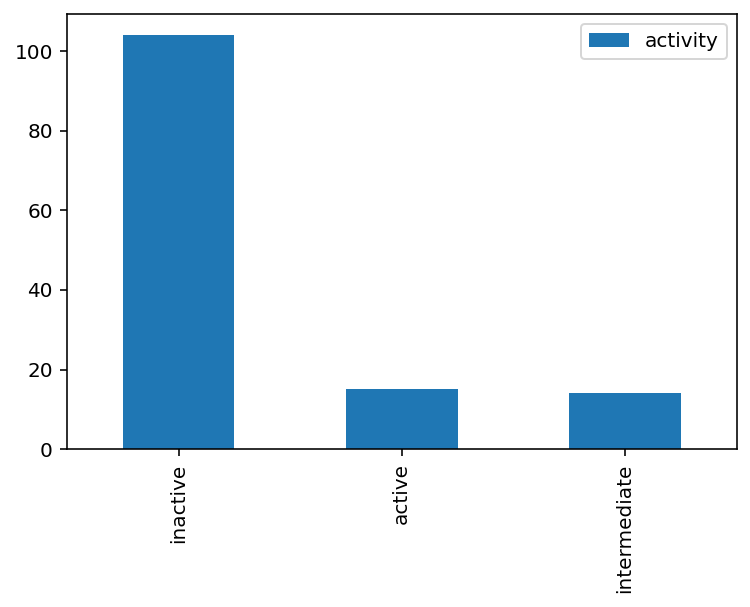

In [58]:
data4.activity.value_counts().to_frame().plot(kind='bar')

## 박스 플롯

In [59]:
def draw_boxes(x, y, data):
  plt.figure(figsize=(6, 6))
  sns.boxplot(x = x, y = y, data = data)
  plt.xlabel(x, fontsize=14, fontweight='bold')
  plt.ylabel(y, fontsize=14, fontweight='bold')
  plt.show()

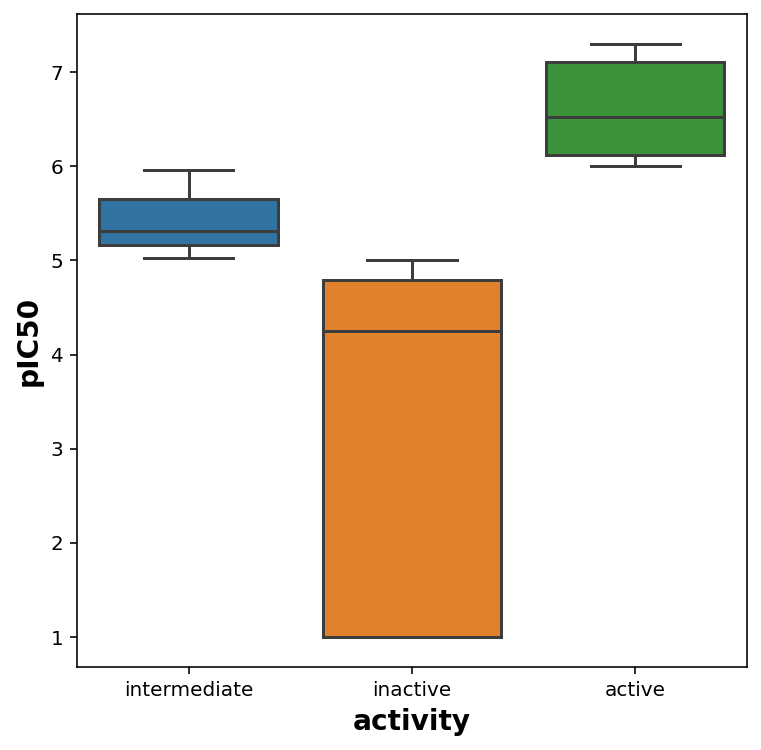

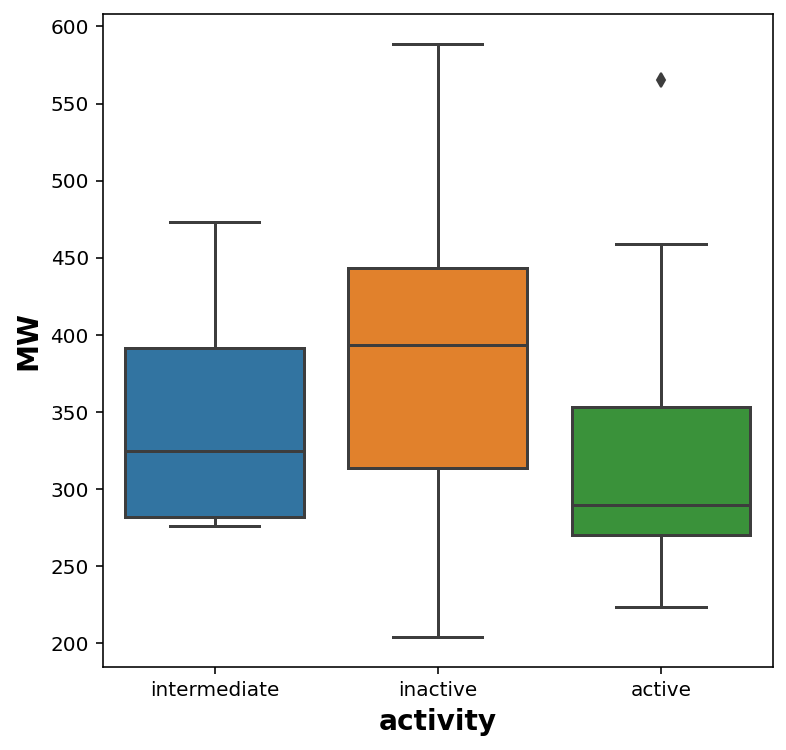

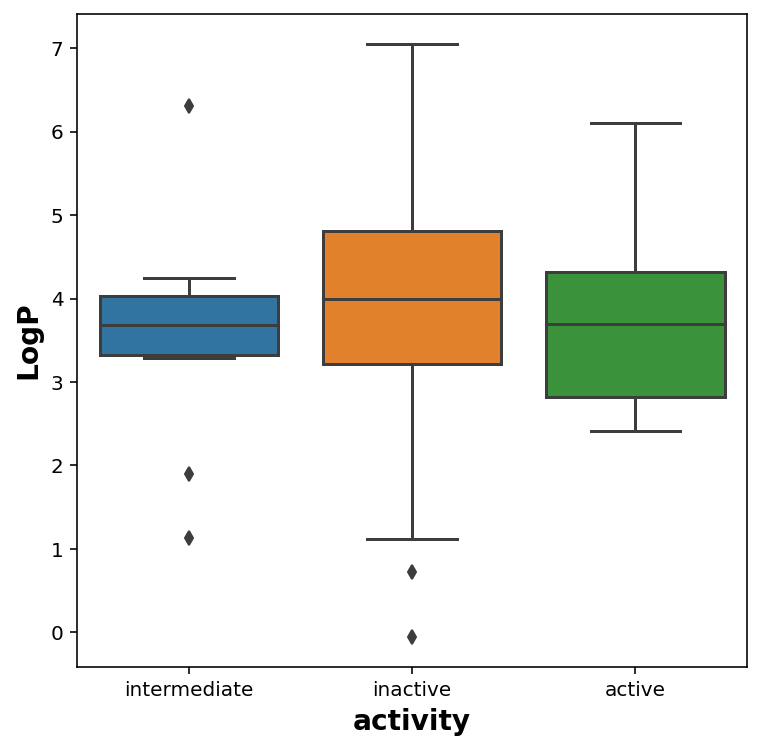

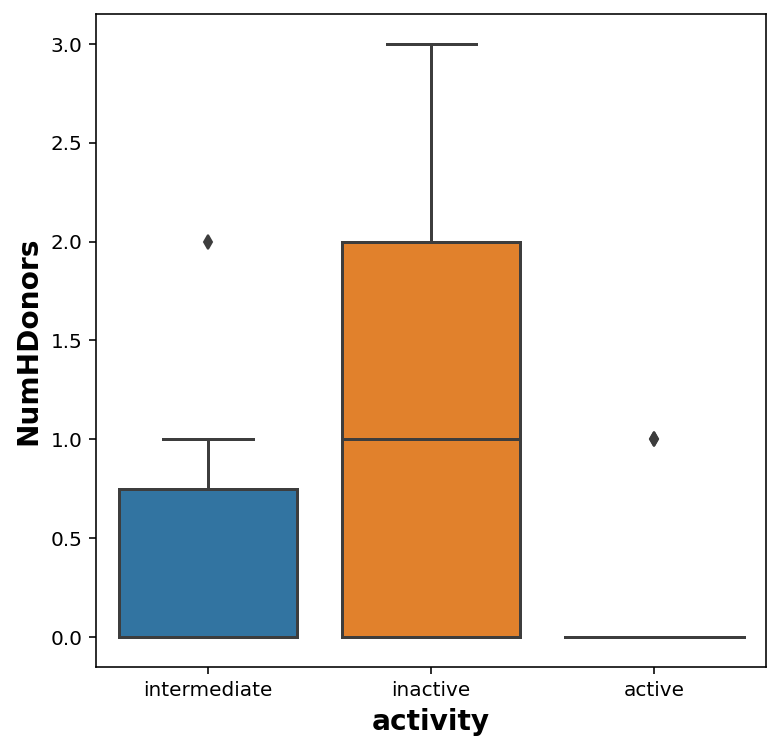

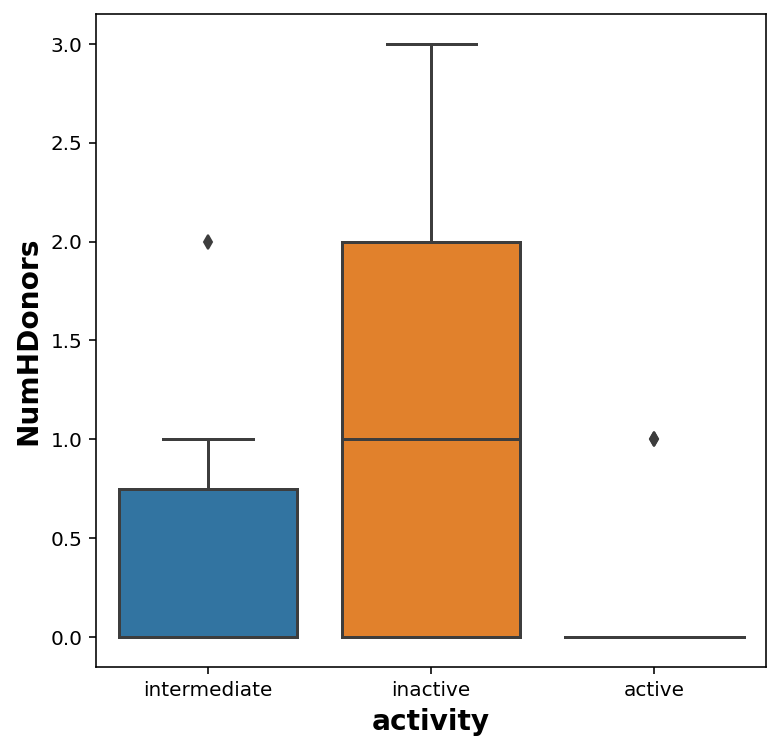

In [33]:
for y in ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHDonors']:
  draw_boxes(x = 'activity', y=y, data = data4)

## 스캐터 플롯

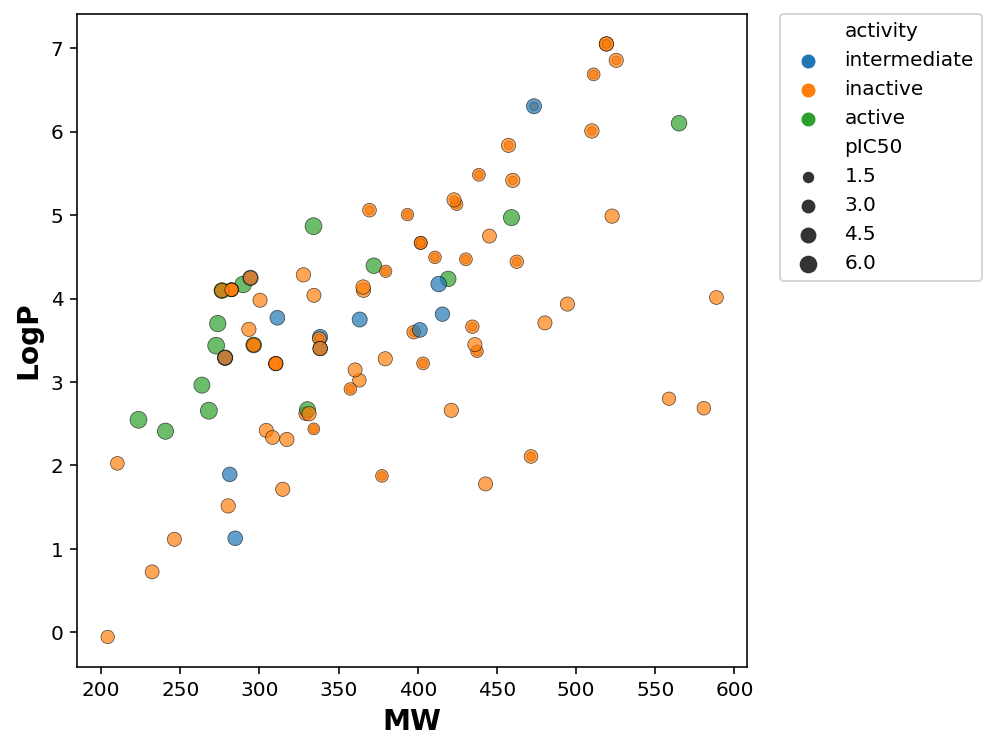

In [60]:
plt.figure(figsize=(6, 6))

sns.scatterplot(x='MW', y='LogP', data=data4, hue='activity', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

## Pair 플롯

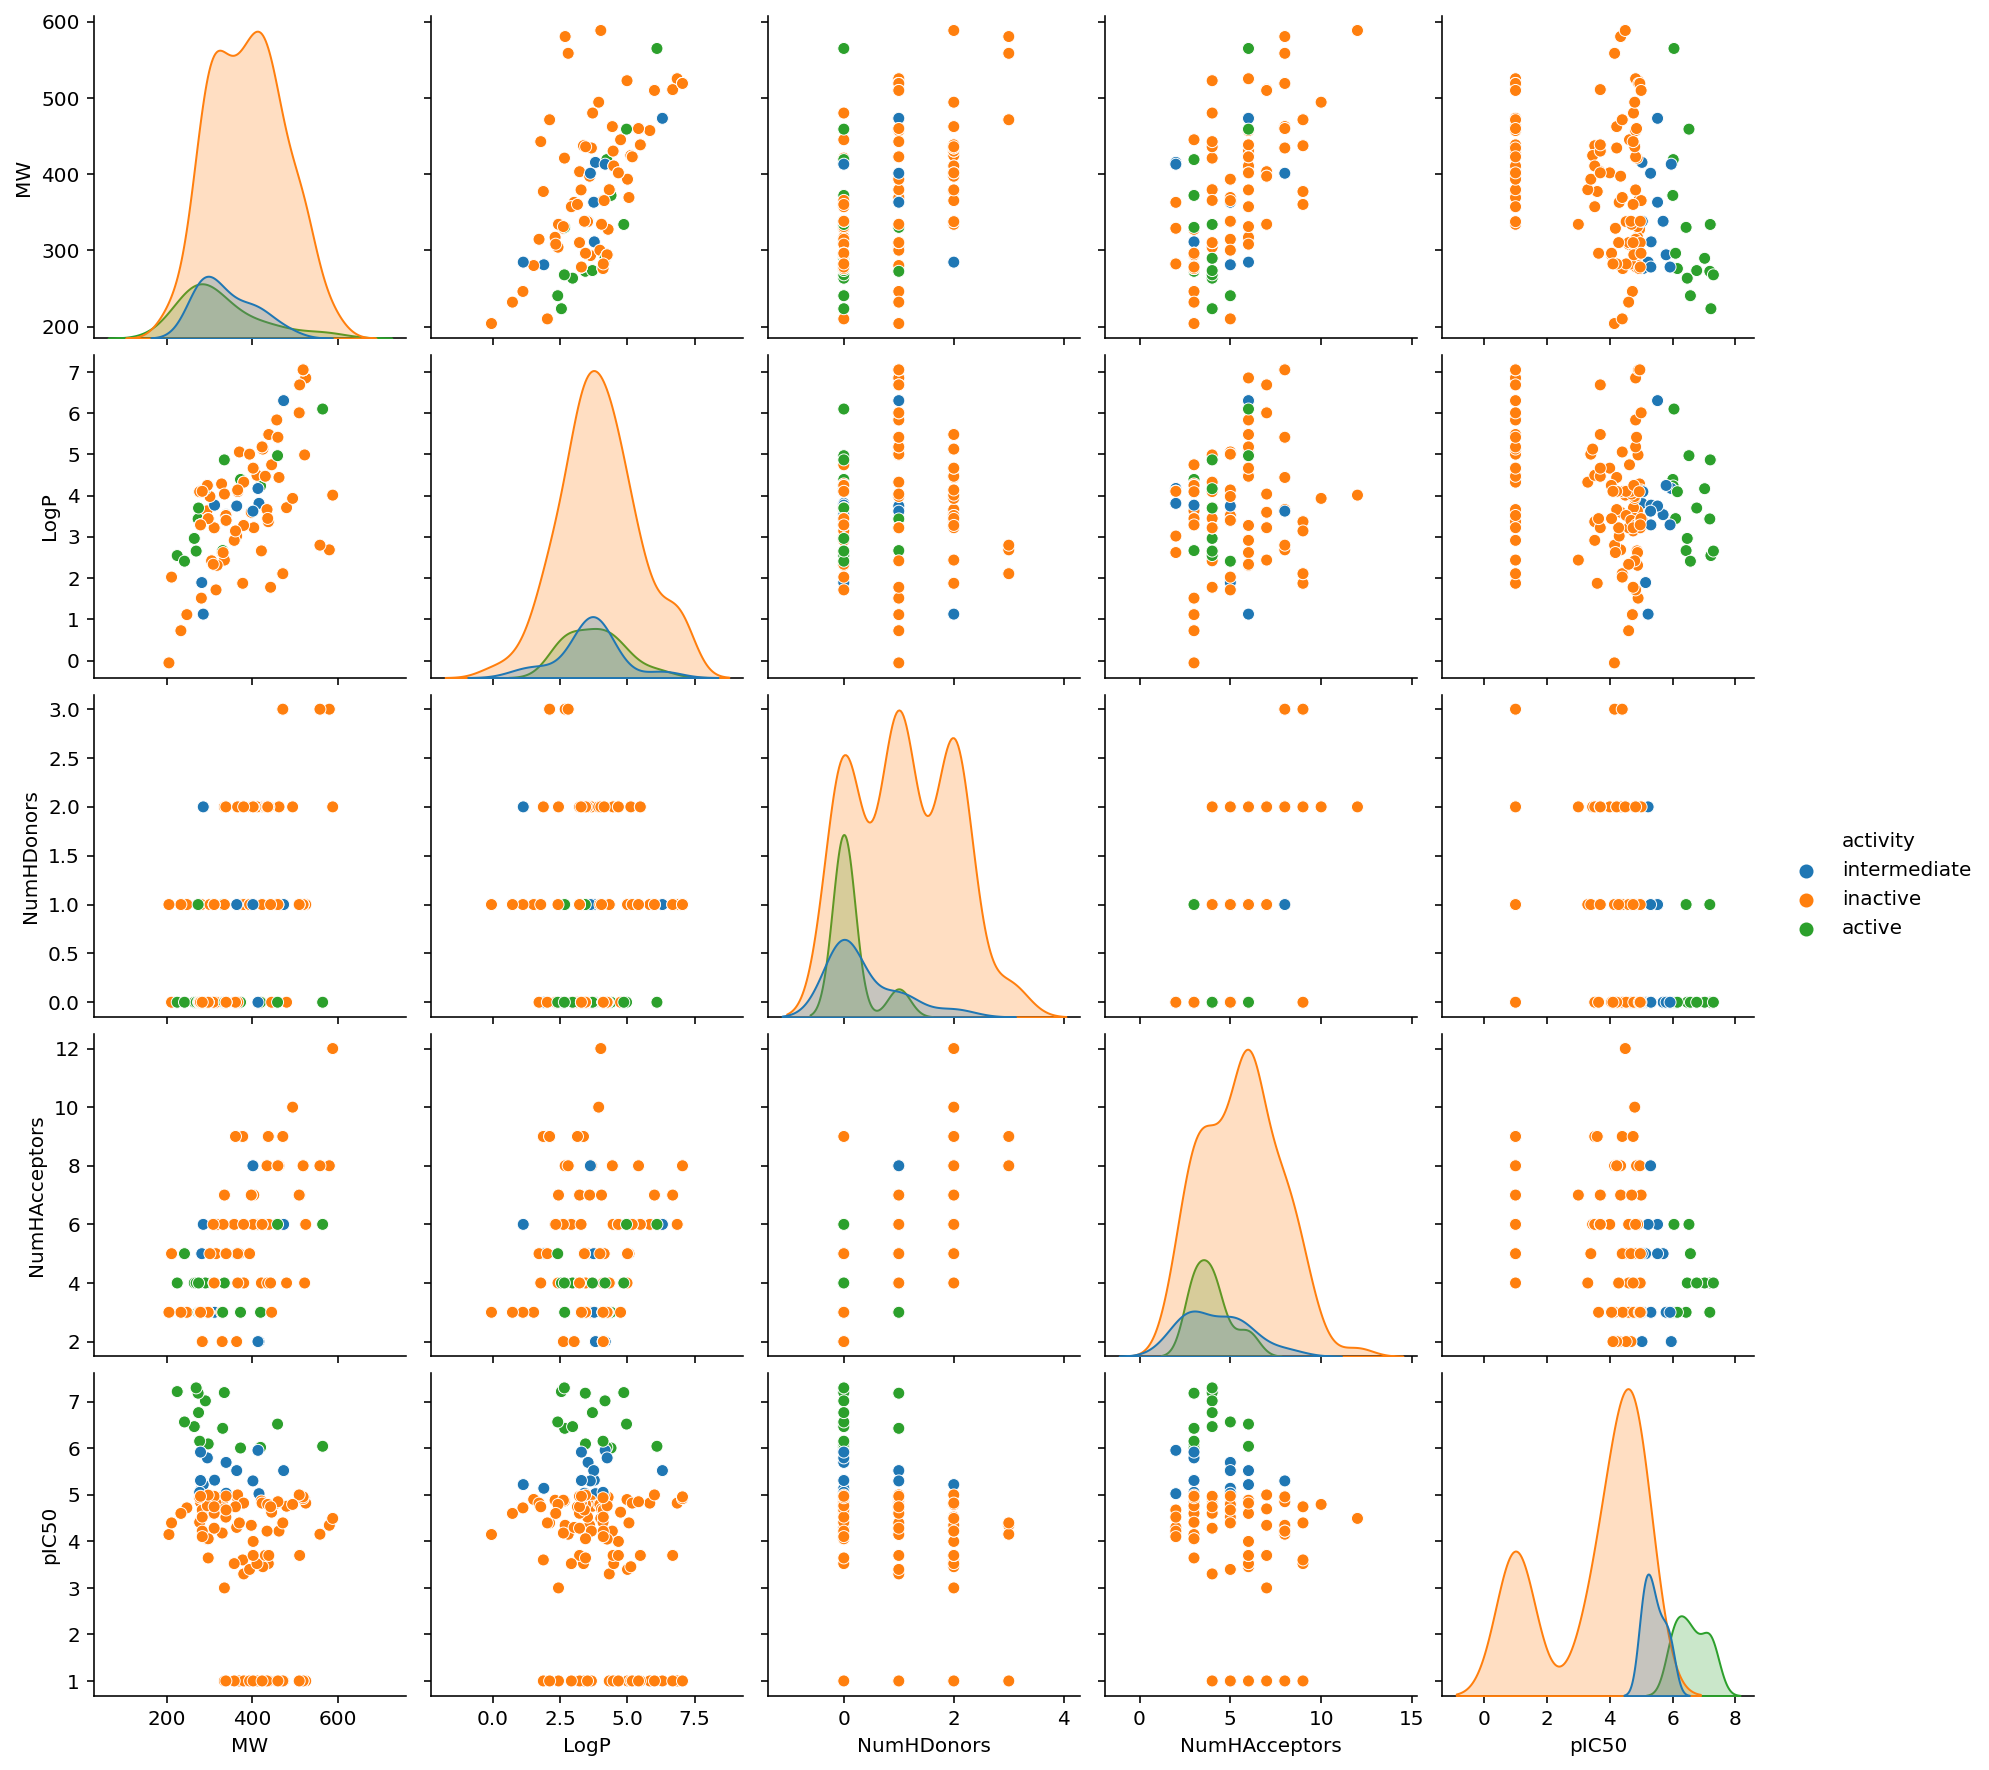

In [61]:
sns.pairplot(data=data4, hue='activity')
plt.show()

# 데이터 저장 

- Export Data

In [62]:
data4.to_csv("corona_processed.csv", index=False)

In [63]:
!head -10 corona_processed.csv

molecule_chembl_id,canonical_smiles,standard_value,activity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0,5,5.142667503568732
CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.813200000000002,0,2,5.026872146400302
CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.19000000000005,2.6605000000000008,0,4,4.8696662315049934
CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.34700000000004,3.6308000000000016,0,3,4.8823973083099155
CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.3440000000001,3.5390000000000024,0,5,5.698970004336019
CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,980.0,active,372.24300000000005,4.393300000000003,0,3,6.008773924307505
CHEMBL187598,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(F)cc21,4820.0,intermediate,311.33700000000005,3.7699000000000016,0,3,5.31695296176115
CHEMBL190743,O=C1

In [64]:
data4

,molecule_chembl_id,canonical_smiles,standard_value,activity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0,5,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0,2,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0,4,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0,3,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0,5,5.698970
...,...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive,338.359,3.40102,0,5,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive,296.366,3.44330,0,3,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive,276.291,4.09564,0,3,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive,278.307,3.29102,0,3,4.970616


# Pubchem 에서 추가정보 얻기
- Pubchem 데이터 액세스를 위해서 pubchempy 라이브러리 설치

In [65]:
!pip install pubchempy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13834 sha256=c8dcedfa57015d6e0a2e3224b48529f7e3daba10ca58cf092fb9aa0bbdc36a43
  Stored in directory: /root/.cache/pip/wheels/7c/3d/8c/8192697412e9899dc55bbbb08bbc1197bef333caaa2a71c448
Successfully built pubchempy


In [66]:
import pubchempy as pcp


## 모든 properties 얻기

- `get_properties` 함수를 사용하여 다양한 속성을 얻을 수 있다
 - 함수에 대한 설명은 [여기](https://pubchempy.readthedocs.io/en/latest/guide/properties.html) 참조

In [67]:
from tqdm import tqdm
all_data = []

for i in tqdm(data4['canonical_smiles']):
    props = pcp.get_properties(['MolecularFormula', 'MolecularWeight',
                                'XLogP', 'ExactMass', 'MonoisotopicMass', 'TPSA', 'Complexity', 'Charge', 
                                'HBondDonorCount', 'HBondAcceptorCount', 'RotatableBondCount', 
                                'HeavyAtomCount', 'IsotopeAtomCount', 'AtomStereoCount', 
                                'DefinedAtomStereoCount', 'UndefinedAtomStereoCount', 'BondStereoCount', 
                                'DefinedBondStereoCount', 'UndefinedBondStereoCount', 'CovalentUnitCount', 
                                'Volume3D', 'XStericQuadrupole3D', 'YStericQuadrupole3D', 
                                'ZStericQuadrupole3D', 'FeatureCount3D', 'FeatureAcceptorCount3D', 
                                'FeatureDonorCount3D', 'FeatureAnionCount3D', 'FeatureCationCount3D', 
                                'FeatureRingCount3D', 'FeatureHydrophobeCount3D', 'ConformerModelRMSD3D', 
                                'EffectiveRotorCount3D', 'ConformerCount3D'], i, 'smiles')
    all_data.append(props)

100%|██████████| 133/133 [04:51<00:00,  2.20s/it]


In [69]:
all_data[0]

[{'CID': 44398160,
  'MolecularFormula': 'C15H11N3O3',
  'MolecularWeight': '281.27',
  'XLogP': 1.4,
  'ExactMass': '281.08004122',
  'MonoisotopicMass': '281.08004122',
  'TPSA': 87.2,
  'Complexity': 512,
  'Charge': 0,
  'HBondDonorCount': 0,
  'HBondAcceptorCount': 5,
  'RotatableBondCount': 2,
  'HeavyAtomCount': 21,
  'IsotopeAtomCount': 0,
  'AtomStereoCount': 0,
  'DefinedAtomStereoCount': 0,
  'UndefinedAtomStereoCount': 0,
  'BondStereoCount': 0,
  'DefinedBondStereoCount': 0,
  'UndefinedBondStereoCount': 0,
  'CovalentUnitCount': 1,
  'Volume3D': 215.4,
  'XStericQuadrupole3D': 8.09,
  'YStericQuadrupole3D': 3.27,
  'ZStericQuadrupole3D': 1.01,
  'FeatureCount3D': 7,
  'FeatureAcceptorCount3D': 4,
  'FeatureDonorCount3D': 0,
  'FeatureAnionCount3D': 0,
  'FeatureCationCount3D': 0,
  'FeatureRingCount3D': 3,
  'FeatureHydrophobeCount3D': 0,
  'ConformerModelRMSD3D': 0.6,
  'EffectiveRotorCount3D': 2.2,
  'ConformerCount3D': 10}]

In [71]:
rows = []
lenth = data4.shape[0]
columns = all_data[0][0].keys()
for i in range(lenth):
    rows.append(all_data[i][0].values())
props_df = pd.DataFrame(data=rows, columns=columns) 
props_df.head()

,CID,MolecularFormula,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,...,FeatureCount3D,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D
0,44398160,C15H11N3O3,281.27,1.4,281.08004122,281.08004122,87.2,512.0,0.0,0.0,...,7.0,4.0,0.0,0.0,0.0,3.0,0.0,0.6,2.2,10.0
1,44398002,C15H8ClFINO2,415.58,3.8,414.92723,414.92723,37.4,449.0,0.0,0.0,...,6.0,2.0,0.0,0.0,0.0,3.0,1.0,0.6,2.2,10.0
2,44398167,C17H12INO4,421.18,3,420.98111,420.98111,55.8,499.0,0.0,0.0,...,9.0,4.0,0.0,0.0,0.0,4.0,1.0,0.6,3.0,10.0
3,44398055,C17H11NO2S,293.3,3.4,293.05104977,293.05104977,65.6,452.0,0.0,0.0,...,6.0,2.0,0.0,0.0,0.0,4.0,0.0,0.6,2.2,10.0
4,44398343,C17H10N2O4S,338.3,3.3,338.03612798,338.03612798,111.0,563.0,0.0,0.0,...,9.0,4.0,0.0,1.0,0.0,4.0,0.0,0.6,3.2,9.0


In [73]:
props_df.columns

Index(['CID', 'MolecularFormula', 'MolecularWeight', 'XLogP', 'ExactMass',
       'MonoisotopicMass', 'TPSA', 'Complexity', 'Charge', 'HBondDonorCount',
       'HBondAcceptorCount', 'RotatableBondCount', 'HeavyAtomCount',
       'IsotopeAtomCount', 'AtomStereoCount', 'DefinedAtomStereoCount',
       'UndefinedAtomStereoCount', 'BondStereoCount', 'DefinedBondStereoCount',
       'UndefinedBondStereoCount', 'CovalentUnitCount', 'Volume3D',
       'XStericQuadrupole3D', 'YStericQuadrupole3D', 'ZStericQuadrupole3D',
       'FeatureCount3D', 'FeatureAcceptorCount3D', 'FeatureDonorCount3D',
       'FeatureAnionCount3D', 'FeatureCationCount3D', 'FeatureRingCount3D',
       'FeatureHydrophobeCount3D', 'ConformerModelRMSD3D',
       'EffectiveRotorCount3D', 'ConformerCount3D'],
      dtype='object')

In [74]:
data4.columns

Index(['molecule_chembl_id', 'canonical_smiles', 'standard_value', 'activity',
       'MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50'],
      dtype='object')

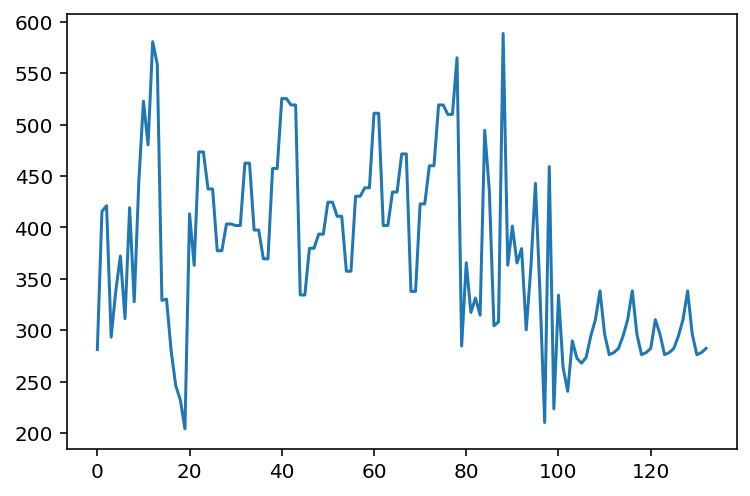

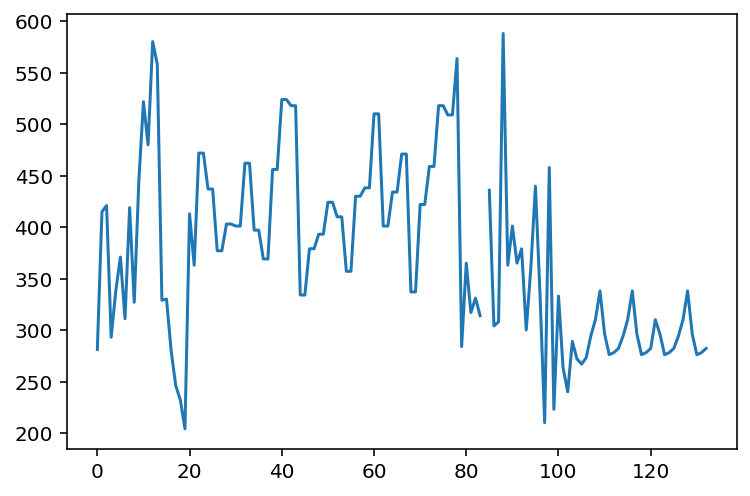

In [92]:
plt.plot(data4.MW)
plt.show()
plt.plot(props_df.ExactMass.astype(float))

# MoleculeNet 데이터 얻기

- deepchem.molnet 모듈에서 제공

In [93]:
all_load = [method for method in dir(dc.molnet) if "load_" in method ]
print(len(all_load))
all_load

42


['load_Platinum_Adsorption',
 'load_bace_classification',
 'load_bace_regression',
 'load_bandgap',
 'load_bbbc001',
 'load_bbbc002',
 'load_bbbp',
 'load_cell_counting',
 'load_chembl',
 'load_chembl25',
 'load_clearance',
 'load_clintox',
 'load_delaney',
 'load_factors',
 'load_freesolv',
 'load_function',
 'load_hiv',
 'load_hopv',
 'load_hppb',
 'load_kaggle',
 'load_kinase',
 'load_lipo',
 'load_mp_formation_energy',
 'load_mp_metallicity',
 'load_muv',
 'load_nci',
 'load_pcba',
 'load_pdbbind',
 'load_perovskite',
 'load_ppb',
 'load_qm7',
 'load_qm8',
 'load_qm9',
 'load_sampl',
 'load_sider',
 'load_sweet',
 'load_thermosol',
 'load_tox21',
 'load_toxcast',
 'load_uspto',
 'load_uv',
 'load_zinc15']

## Dataset 다운로드

- dc.molnet.load_XXX() 함수 사용
- load_delaney()를 사용하면 Delaney 용해도  dataset을 다운로드함
 - 1128개 화합물의 용해도 데이터
- 다운로드시 원하는 feature를 선택할 수 있다
- 아래에서는 그래프 콘볼류션 표현법을 선택

In [96]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='ECFP')
train_dataset, valid_dataset, test_dataset = datasets

In [97]:
print(tasks)
print(test_dataset)

['measured log solubility in mols per litre']
<DiskDataset X.shape: (113, 1024), y.shape: (113, 1), w.shape: (113, 1), ids: ['c1cc2ccc3cccc4ccc(c1)c2c34' 'Cc1cc(=O)[nH]c(=S)[nH]1'
 'Oc1ccc(cc1)C2(OC(=O)c3ccccc23)c4ccc(O)cc4 ' ...
 'c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43' 'Cc1occc1C(=O)Nc2ccccc2'
 'OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O '], task_names: ['measured log solubility in mols per litre']>


## load_XXX() 옵션
### featurizer 
- 'ECFP', 'GraphConv', 'Weave', 'smiles2img' 등을 선택할 수 있다

### splitter 
- 'None', 'index', 'random', 'scaffold', 'stratified' 등을 선택할 수 있다


## load_XXX() 리턴 값

- `tasks`: 태스크 이름을 알려준다 (타겟 작업이 무엇인지. 하나 또는 복수)
- `datasets`: `dc.data.Dataset` 객체로서 `(train, valid, test)` 세 부분으로 나누어준다
- `transformers`: `dc.trans.Transformer` 객체로서 전처리 방법을 알려준다

- `DiskDataset`은 하드디스크에 저장하고 액세스할 데이터셋이다.
- `NumpyDataset` 은 메인 메모리에 저장하고 사용할 데이터로 NumPy arrays 형식으로 저장된다  
- `ImageDataset`은 디스크에 저장되는 이미지 데이터 형식이다 

- 여기서 각 행은 샘플을 가리키며 여기서는 분자를 구분하며 다음의 값들을 갖는다
 - The *features*, referred to as `X`.  
 - The *labels*, referred to as `y`.  
 - The *weights*, referred to as `w` (이 샘플의 가중치를 표시)  
 - An *ID*, is a unique identifier (여기서는 SMILES를 사용)

## 데이터를 읽는 다른 방법
- `iterbatches(batch_size=100, epochs=10, deterministic=False)` 
 - epoch를 지정할 수 있으며, 읽을 때마다 순서를 랜덤하게 바꾼다
- `to_dataframe()`을 사용하면 데이터프레임으로 읽는다
- TensorFlow 타입, 즉 `tensorflow.data.Dataset`을 얻으려면 `make_tf_dataset()`를 사용한다  
- Torch 타입의 `torch.utils.data.IterableDataset`을 얻으려면 `make_pytorch_dataset()`를 사용한다



# Datasets 새로 생성하기

- `NumpyDataset`을 사용하여 DeepChem Dataset을 만들 수 있다

In [99]:
import numpy as np

X = np.random.random((10, 5))
y = np.random.random((10, 2))
dataset = dc.data.NumpyDataset(X=X, y=y)
print(dataset)

<NumpyDataset X.shape: (10, 5), y.shape: (10, 2), w.shape: (10, 1), ids: [0 1 2 3 4 5 6 7 8 9], task_names: [0 1]>


- weights 와 IDs는 자동으로 배정되었다.  (w=1)

In [100]:
dataset.to_dataframe()

,X1,X2,X3,X4,X5,y1,y2,w,ids
0,0.141085,0.434356,0.643049,0.276188,0.547673,0.891071,0.556996,1.0,0
1,0.919576,0.960221,0.024507,0.922165,0.837927,0.112053,0.734132,1.0,1
2,0.800956,0.149406,0.092428,0.970849,0.643506,0.176448,0.974502,1.0,2
3,0.776849,0.141271,0.571139,0.939334,0.181023,0.868032,0.358852,1.0,3
4,0.368202,0.518074,0.181327,0.761670,0.677683,0.301591,0.025142,1.0,4
5,0.560557,0.274236,0.895975,0.869348,0.399268,0.187659,0.702697,1.0,5
6,0.728754,0.488061,0.020321,0.994794,0.078009,0.982269,0.496326,1.0,6
7,0.986724,0.892380,0.382841,0.216008,0.895569,0.149876,0.606588,1.0,7
8,0.093672,0.405369,0.467098,0.617709,0.041067,0.563602,0.671620,1.0,8
9,0.325209,0.633017,0.499791,0.049462,0.066515,0.759356,0.107000,1.0,9


## DiskDataset 만들기
- NumPy arrays가 있으면 `DiskDataset.from_numpy()` 를 사용하여 만들 수 있다

In [101]:
import tempfile

with tempfile.TemporaryDirectory() as data_dir:
    disk_dataset = dc.data.DiskDataset.from_numpy(X=X, y=y, data_dir=data_dir)
    print(disk_dataset)

<DiskDataset X.shape: (10, 5), y.shape: (10, 2), w.shape: (10, 1), ids: [0 1 2 3 4 5 6 7 8 9], task_names: [0 1]>


- 대용량의 데이터를 읽을 때 DeepChem의 `DataLoader` 를 사용하여 편리하게 읽을 수 있다.

